In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib as mlp
import warnings


plt.style.use('dark_background')

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 16
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'


pd.options.display.max_columns = 500

In [2]:
X = np.random.uniform(low=0, high=20, size=(500, 1))

def target(x):
    return x + 3 * np.sin(2*x)

noise = np.random.normal(loc=0, scale=1, size=(500,1))

Y = target(X) + noise

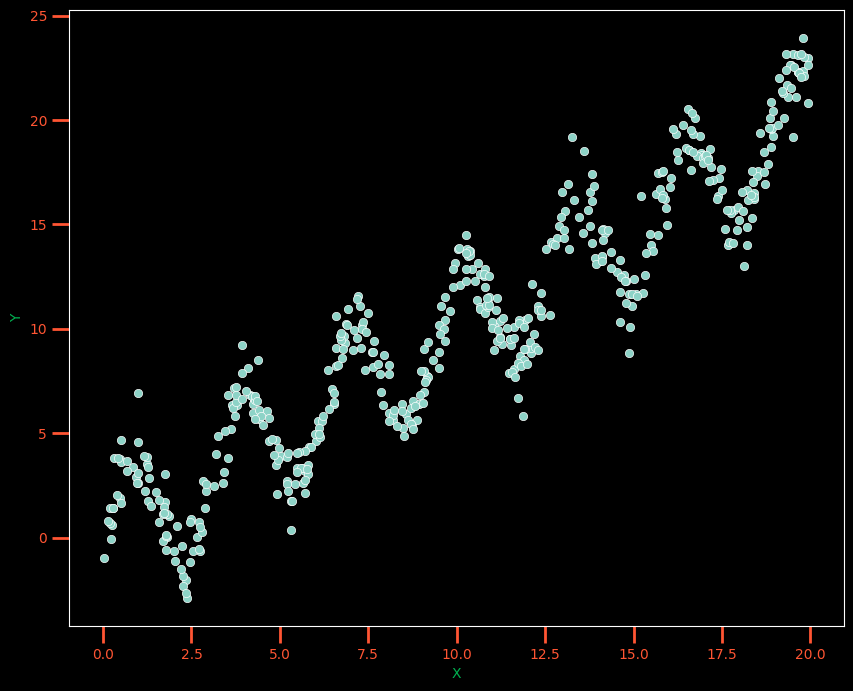

In [3]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(10, 8)

sns.scatterplot(x=X.flatten(), y=Y.flatten())
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

splitter = KFold(n_splits=5, shuffle=True, random_state=33)

linear = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)

linear_cv = cross_validate(linear,
                           X, 
                           Y, 
                           cv=splitter,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

knn_cv = cross_validate(knn,
                        X,
                        Y,
                        cv=splitter,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

In [5]:
display(f"Среднее MSE линейной модели на трейне: {-np.mean(linear_cv['train_score']):.3f}")
display(f"Среднее MSE линейной модели на тесте: {-np.mean(linear_cv['test_score']):.3f}")

display(f"Среднее MSE KNN модели на трейне: {-np.mean(knn_cv['train_score']):.3f}")
display(f"Среднее MSE KNN модели на тесте: {-np.mean(knn_cv['test_score']):.3f}")

'Среднее MSE линейной модели на трейне: 5.517'

'Среднее MSE линейной модели на тесте: 5.580'

'Среднее MSE KNN модели на трейне: 0.673'

'Среднее MSE KNN модели на тесте: 1.307'

In [6]:
linear.fit(X, Y)
knn.fit(X, Y)

KNeighborsRegressor(n_neighbors=3)

In [7]:
new_X = np.random.uniform(low=20, high=30, size=(50,1))

new_noise = np.random.normal(loc=0, scale=1, size=(50,1))

new_Y = target(new_X) + new_noise

knn_preds = knn.predict(new_X)
linear_preds = linear.predict(new_X)


In [8]:
display(f"MSE линейной регрессии на новых данных: {np.mean((linear_preds - new_Y)**2):.3f}")
display(f"MSE KNN на новых данных: {np.mean((knn_preds - new_Y)**2):.3f}")

'MSE линейной регрессии на новых данных: 5.653'

'MSE KNN на новых данных: 22.323'

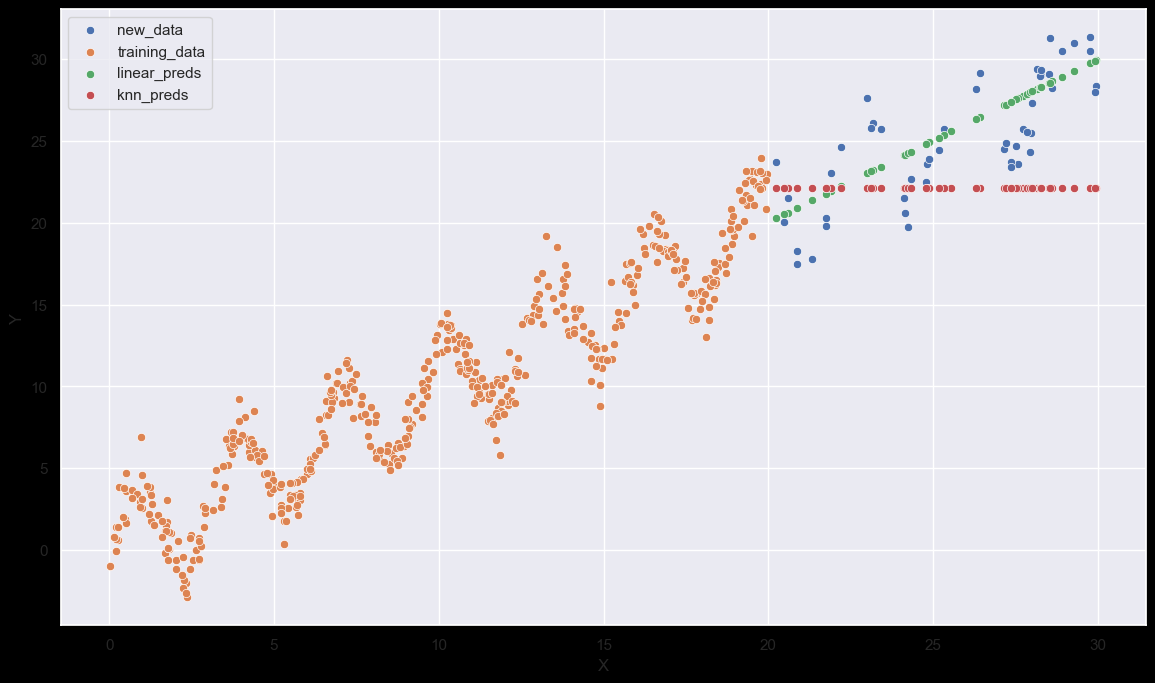

In [9]:
fig = plt.figure()
fig.set_size_inches(14, 8)

sns.set()
sns.scatterplot(x=new_X.ravel(), y=new_Y.ravel(), label="new_data")
sns.scatterplot(x=X.ravel(), y=Y.ravel(), label="training_data")
sns.scatterplot(x=new_X.ravel(), y=linear_preds.ravel(), label="linear_preds")
sns.scatterplot(x=new_X.ravel(), y=knn_preds.ravel(), label="knn_preds")

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### KNN: Подбор числа K

<function matplotlib.pyplot.show(close=None, block=None)>

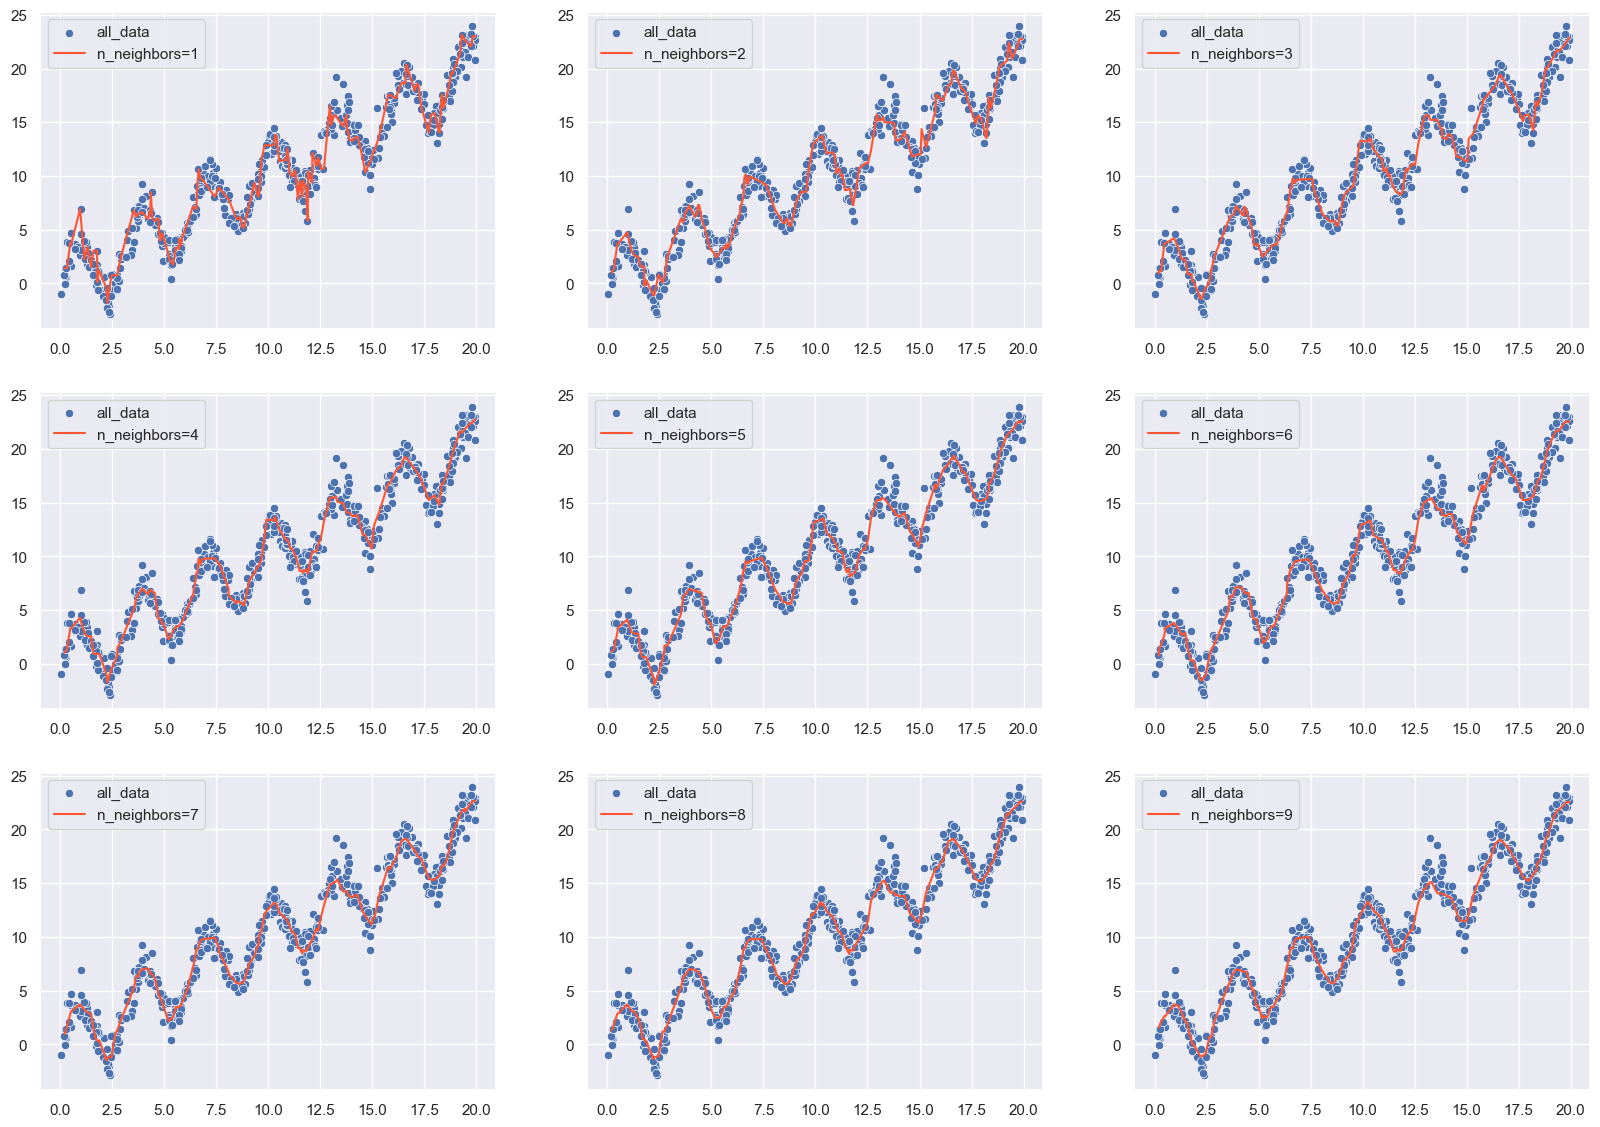

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.33,
                                                    random_state=33)

fig = plt.figure()
fig.set_size_inches(20, 14)

for K in range (1, 10):
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X_train, y_train)

    preds_test = knn.predict(X_test)

    ax = fig.add_subplot(3, 3, K)

    sns.scatterplot(x=X.ravel(), y=Y.ravel(), label="all_data")

    sns.lineplot(x=X_test.ravel(), y=preds_test.ravel(), color="#FF5533", label=f"n_neighbors={K}")

plt.legend()
plt.show

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

search = GridSearchCV(
    knn,
    param_grid,
    cv=splitter
)

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.97008):
{'n_neighbors': 7}


In [12]:
best_knn = search.best_estimator_

In [13]:
best_knn.predict([X[5]])

array([[7.84072854]])

In [14]:
np.random.seed(52)
arr_rand = np.random.uniform(low=0, high=20, size=(500, 1))
noise = np.random.normal(loc=0, scale=1, size=(500, 1))
df = pd.DataFrame({'Random_Uniform': arr_rand.flatten(), 'Noise': noise.flatten()})
df

,Random_Uniform,Noise
0,16.462207,0.120909
1,0.522360,0.397865
2,4.215413,0.284710
3,12.368435,1.629103
4,1.965689,-1.475952
...,...,...
495,1.407459,0.847266
496,8.998825,-1.289410
497,15.865964,0.260540
498,15.895887,0.867094


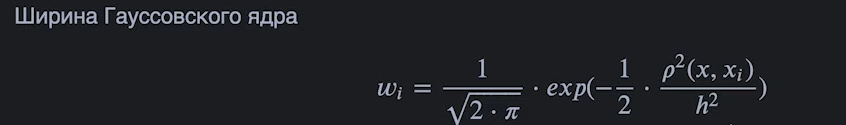

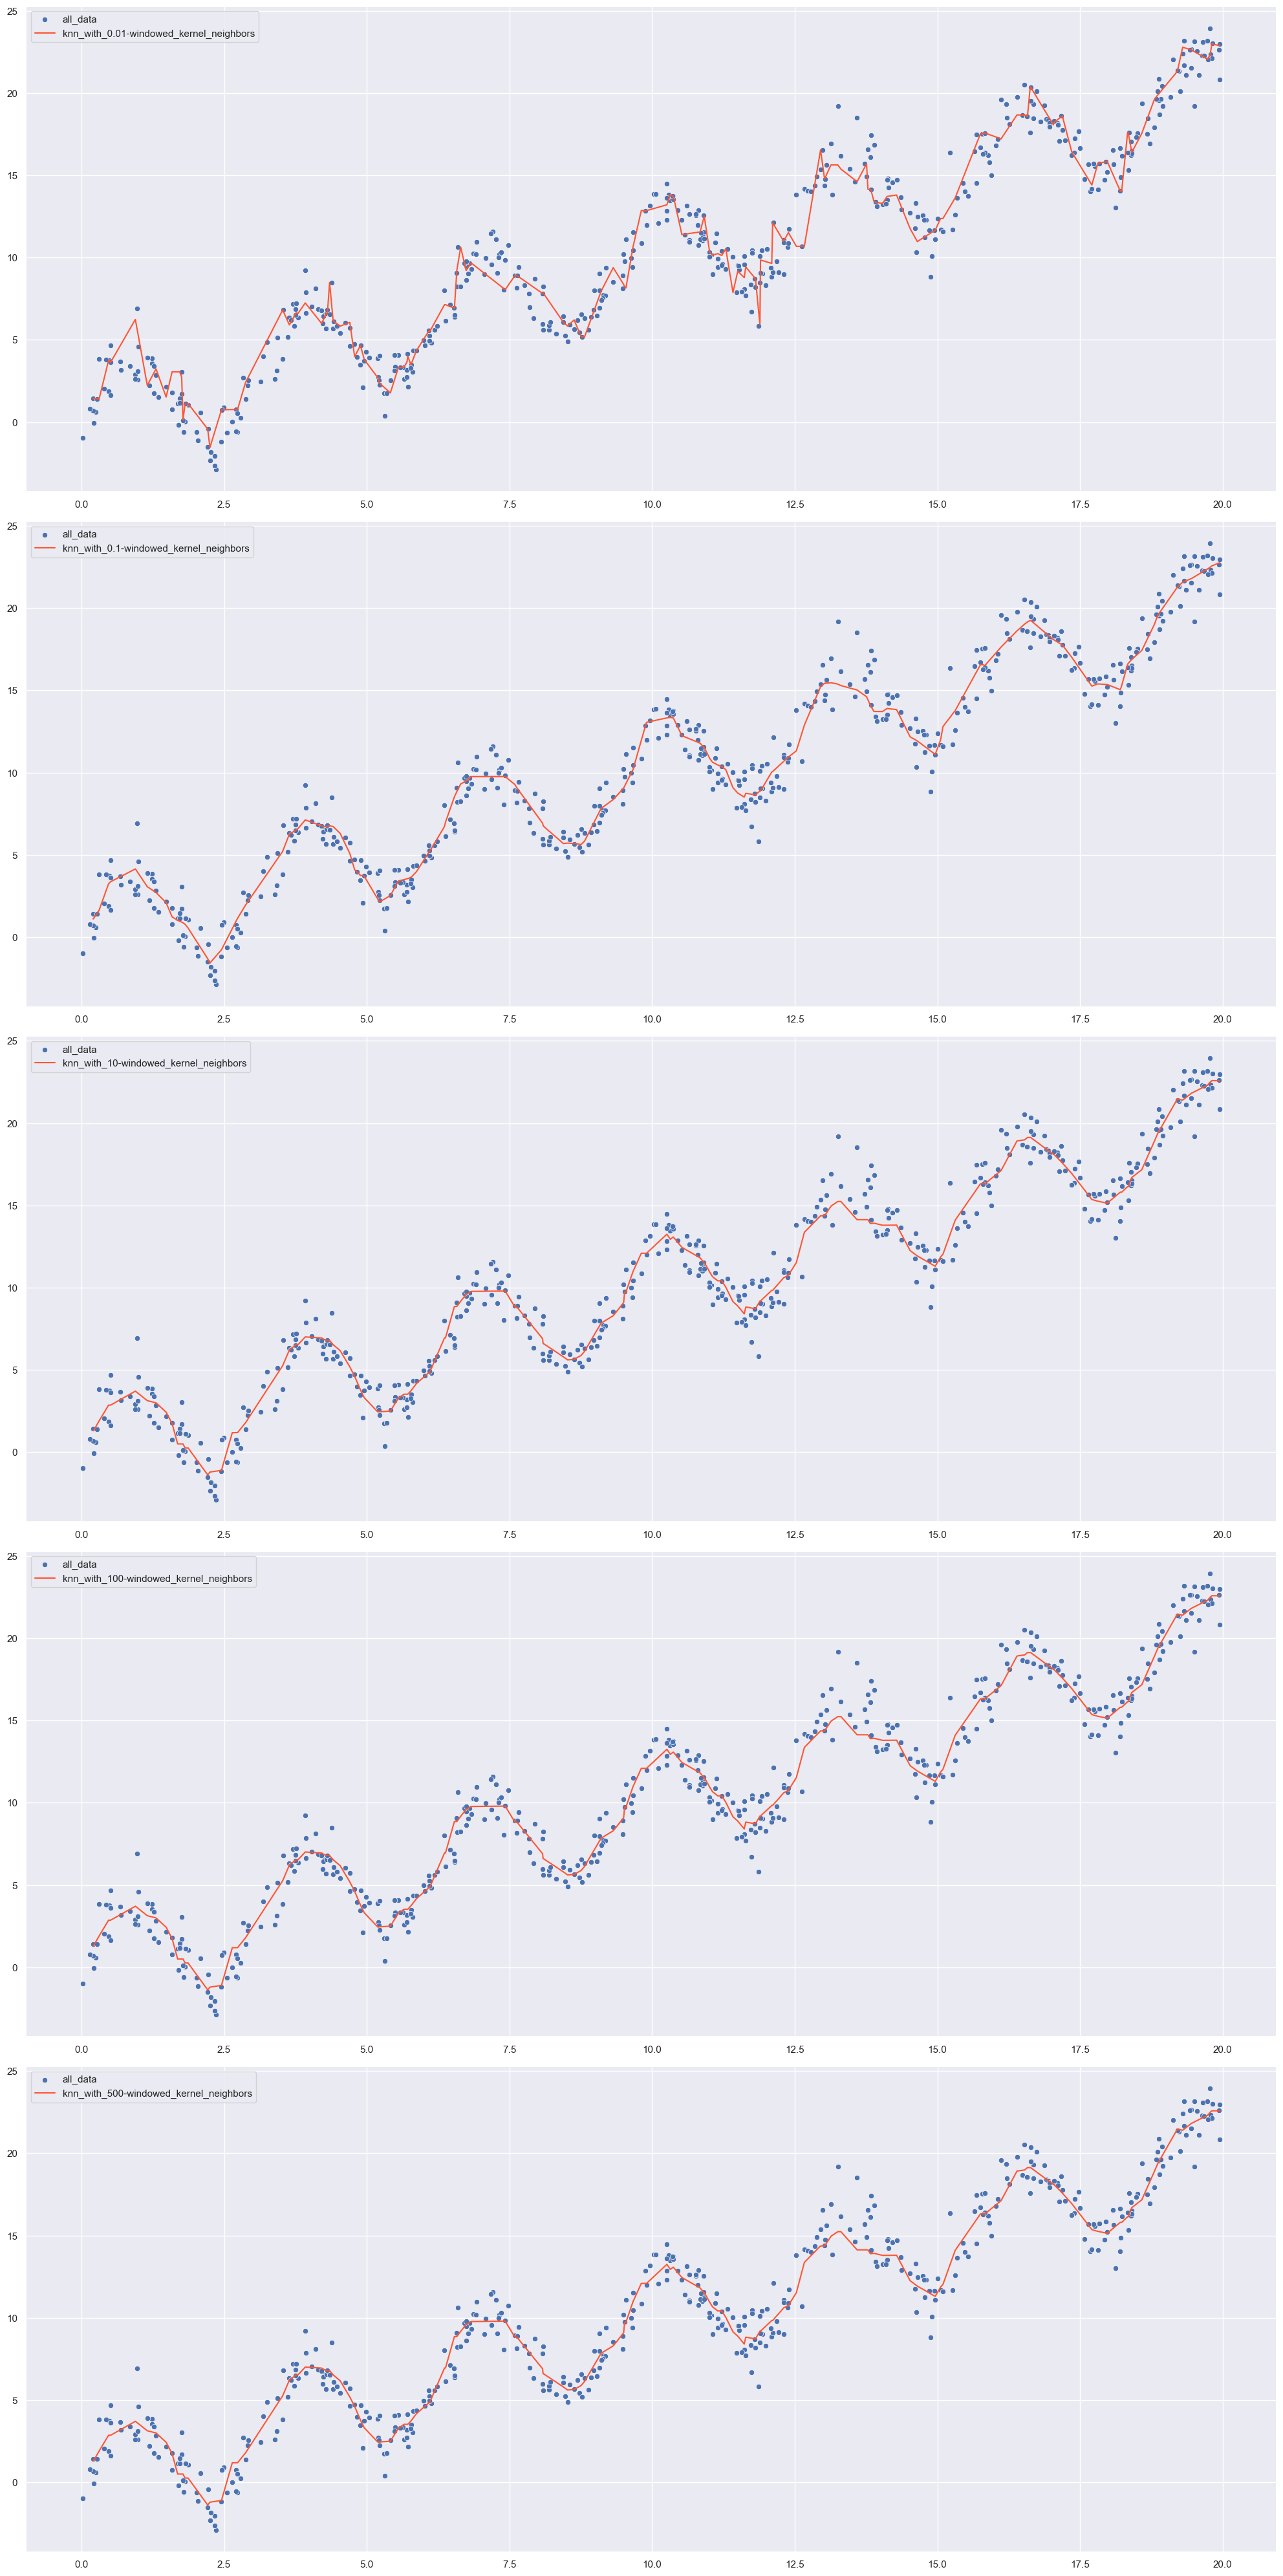

In [15]:
from sklearn.neighbors import KernelDensity

fig = plt.figure()
fig.set_size_inches(20, 40)

k=1

for h in [0.01, 0.1, 10, 100, 500]:

    def kernel(distances, h=h):

        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2

        return const * np.exp(power)
    
    knn = KNeighborsRegressor(n_neighbors=8, weights=kernel)
    knn.fit(X_train, y_train)

    preds_test = knn.predict(X_test)

    ax = fig.add_subplot(5, 1, k)

    k+=1

    sns.scatterplot(x=X.ravel(), y=Y.ravel(), label="all_data")
    sns.lineplot(x=X_test.ravel(), y=preds_test.ravel(), color="#FF5533", label=f"knn_with_{h}-windowed_kernel_neighbors")

fig.tight_layout()

### KNN: Сегментация клиентов 

In [16]:
data = pd.read_excel("../data/processed_segmentation.xlsx")
data.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,22,1.000000,4.0,D,1,0,0,0.075826,0.109610,0.734985,0,1,0.213039,0.100092,0.381084
1,38,2.641663,3.0,A,0,1,1,0.270386,0.107296,0.251788,0,0,0.213039,0.100092,0.381084
2,67,1.000000,1.0,B,0,1,1,0.270386,0.107296,0.251788,0,1,0.234287,0.285472,0.248400
3,67,0.000000,2.0,B,1,1,1,0.253612,0.224719,0.205457,1,0,0.234287,0.285472,0.248400
4,40,2.641663,6.0,A,0,1,1,0.232877,0.155954,0.226554,1,0,0.234287,0.285472,0.248400


In [17]:
X = data.drop("Segmentation", axis=1)
Y = data["Segmentation"]

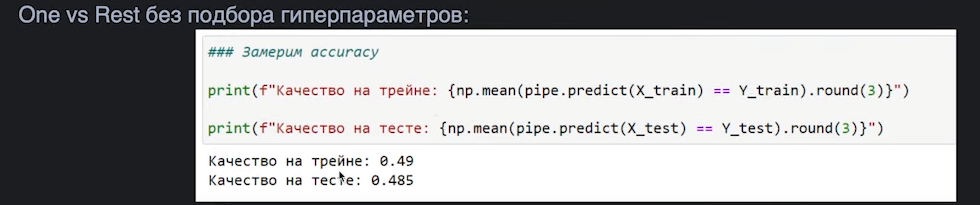

In [18]:
def kernel(distances, h=h):

    const = 1 / (np.sqrt(2 * np.pi))
    power = (-1/2) * ((distances)**2) / h**2

    return const * np.exp(power)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("KNN", KNeighborsClassifier(weights=kernel))
])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(weights=<function kernel at 0x000001FBF89A2D40>))])

In [23]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('KNN',
   KNeighborsClassifier(weights=<function kernel at 0x000001FBF89A2D40>))],
 'verbose': False,
 'scaler': StandardScaler(),
 'KNN': KNeighborsClassifier(weights=<function kernel at 0x000001FBF89A2D40>),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 5,
 'KNN__p': 2,
 'KNN__weights': <function __main__.kernel(distances, h=500)>}

In [22]:
display(f"Качество на трейне: {np.mean(pipe.predict(X_train) == Y_train):.3f}")
display(f"Качество на тесте: {np.mean(pipe.predict(X_test) == Y_test):.3f}")

'Качество на трейне: 0.695'

'Качество на тесте: 0.487'

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

param_grid = {
    "KNN__n_neighbors": np.linspace(1, 100, 10, dtype=int),
    "KNN__p": np.linspace(1, 5, 5, dtype=int),
    "KNN__weights": ["uniform", "distance", kernel]
}

test_fold = [0 if x in X_train.index.values else -1 for x in X.index.values]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(pipe, param_grid, cv=ps)
search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.50031):
{'KNN__n_neighbors': 67, 'KNN__p': 1, 'KNN__weights': 'distance'}
